In [ ]:
!pip install git+https://github.com/cmudrc/drcutils -qqq

     |████████████████████████████████| 182 kB 4.6 MB/s 
     |████████████████████████████████| 451 kB 12.1 MB/s 
     |████████████████████████████████| 11.6 MB 47.2 MB/s 
     |████████████████████████████████| 67 kB 2.2 MB/s 
     |████████████████████████████████| 212 kB 36.8 MB/s 
     |████████████████████████████████| 132 kB 54.9 MB/s 
     |████████████████████████████████| 127 kB 45.0 MB/s 
     |████████████████████████████████| 84 kB 1.8 MB/s 
     |████████████████████████████████| 278 kB 50.5 MB/s 
     |████████████████████████████████| 2.3 MB 31.5 MB/s 
     |████████████████████████████████| 54 kB 1.3 MB/s 
     |████████████████████████████████| 56 kB 2.0 MB/s 
     |████████████████████████████████| 106 kB 39.7 MB/s 
     |████████████████████████████████| 84 kB 365 kB/s 
     |████████████████████████████████| 55 kB 855 kB/s 
     |████████████████████████████████| 213 kB 51.3 MB/s 
     |████████████████████████████████| 64 kB 1.3 MB/s 
     |██████████████████████

In [ ]:
from drcutils.plotting_stack import *

In [ ]:
COLORS

['#000000', '#1A4C49', '#4C8687', '#58B7BB', '#EA8534', '#DF5227']

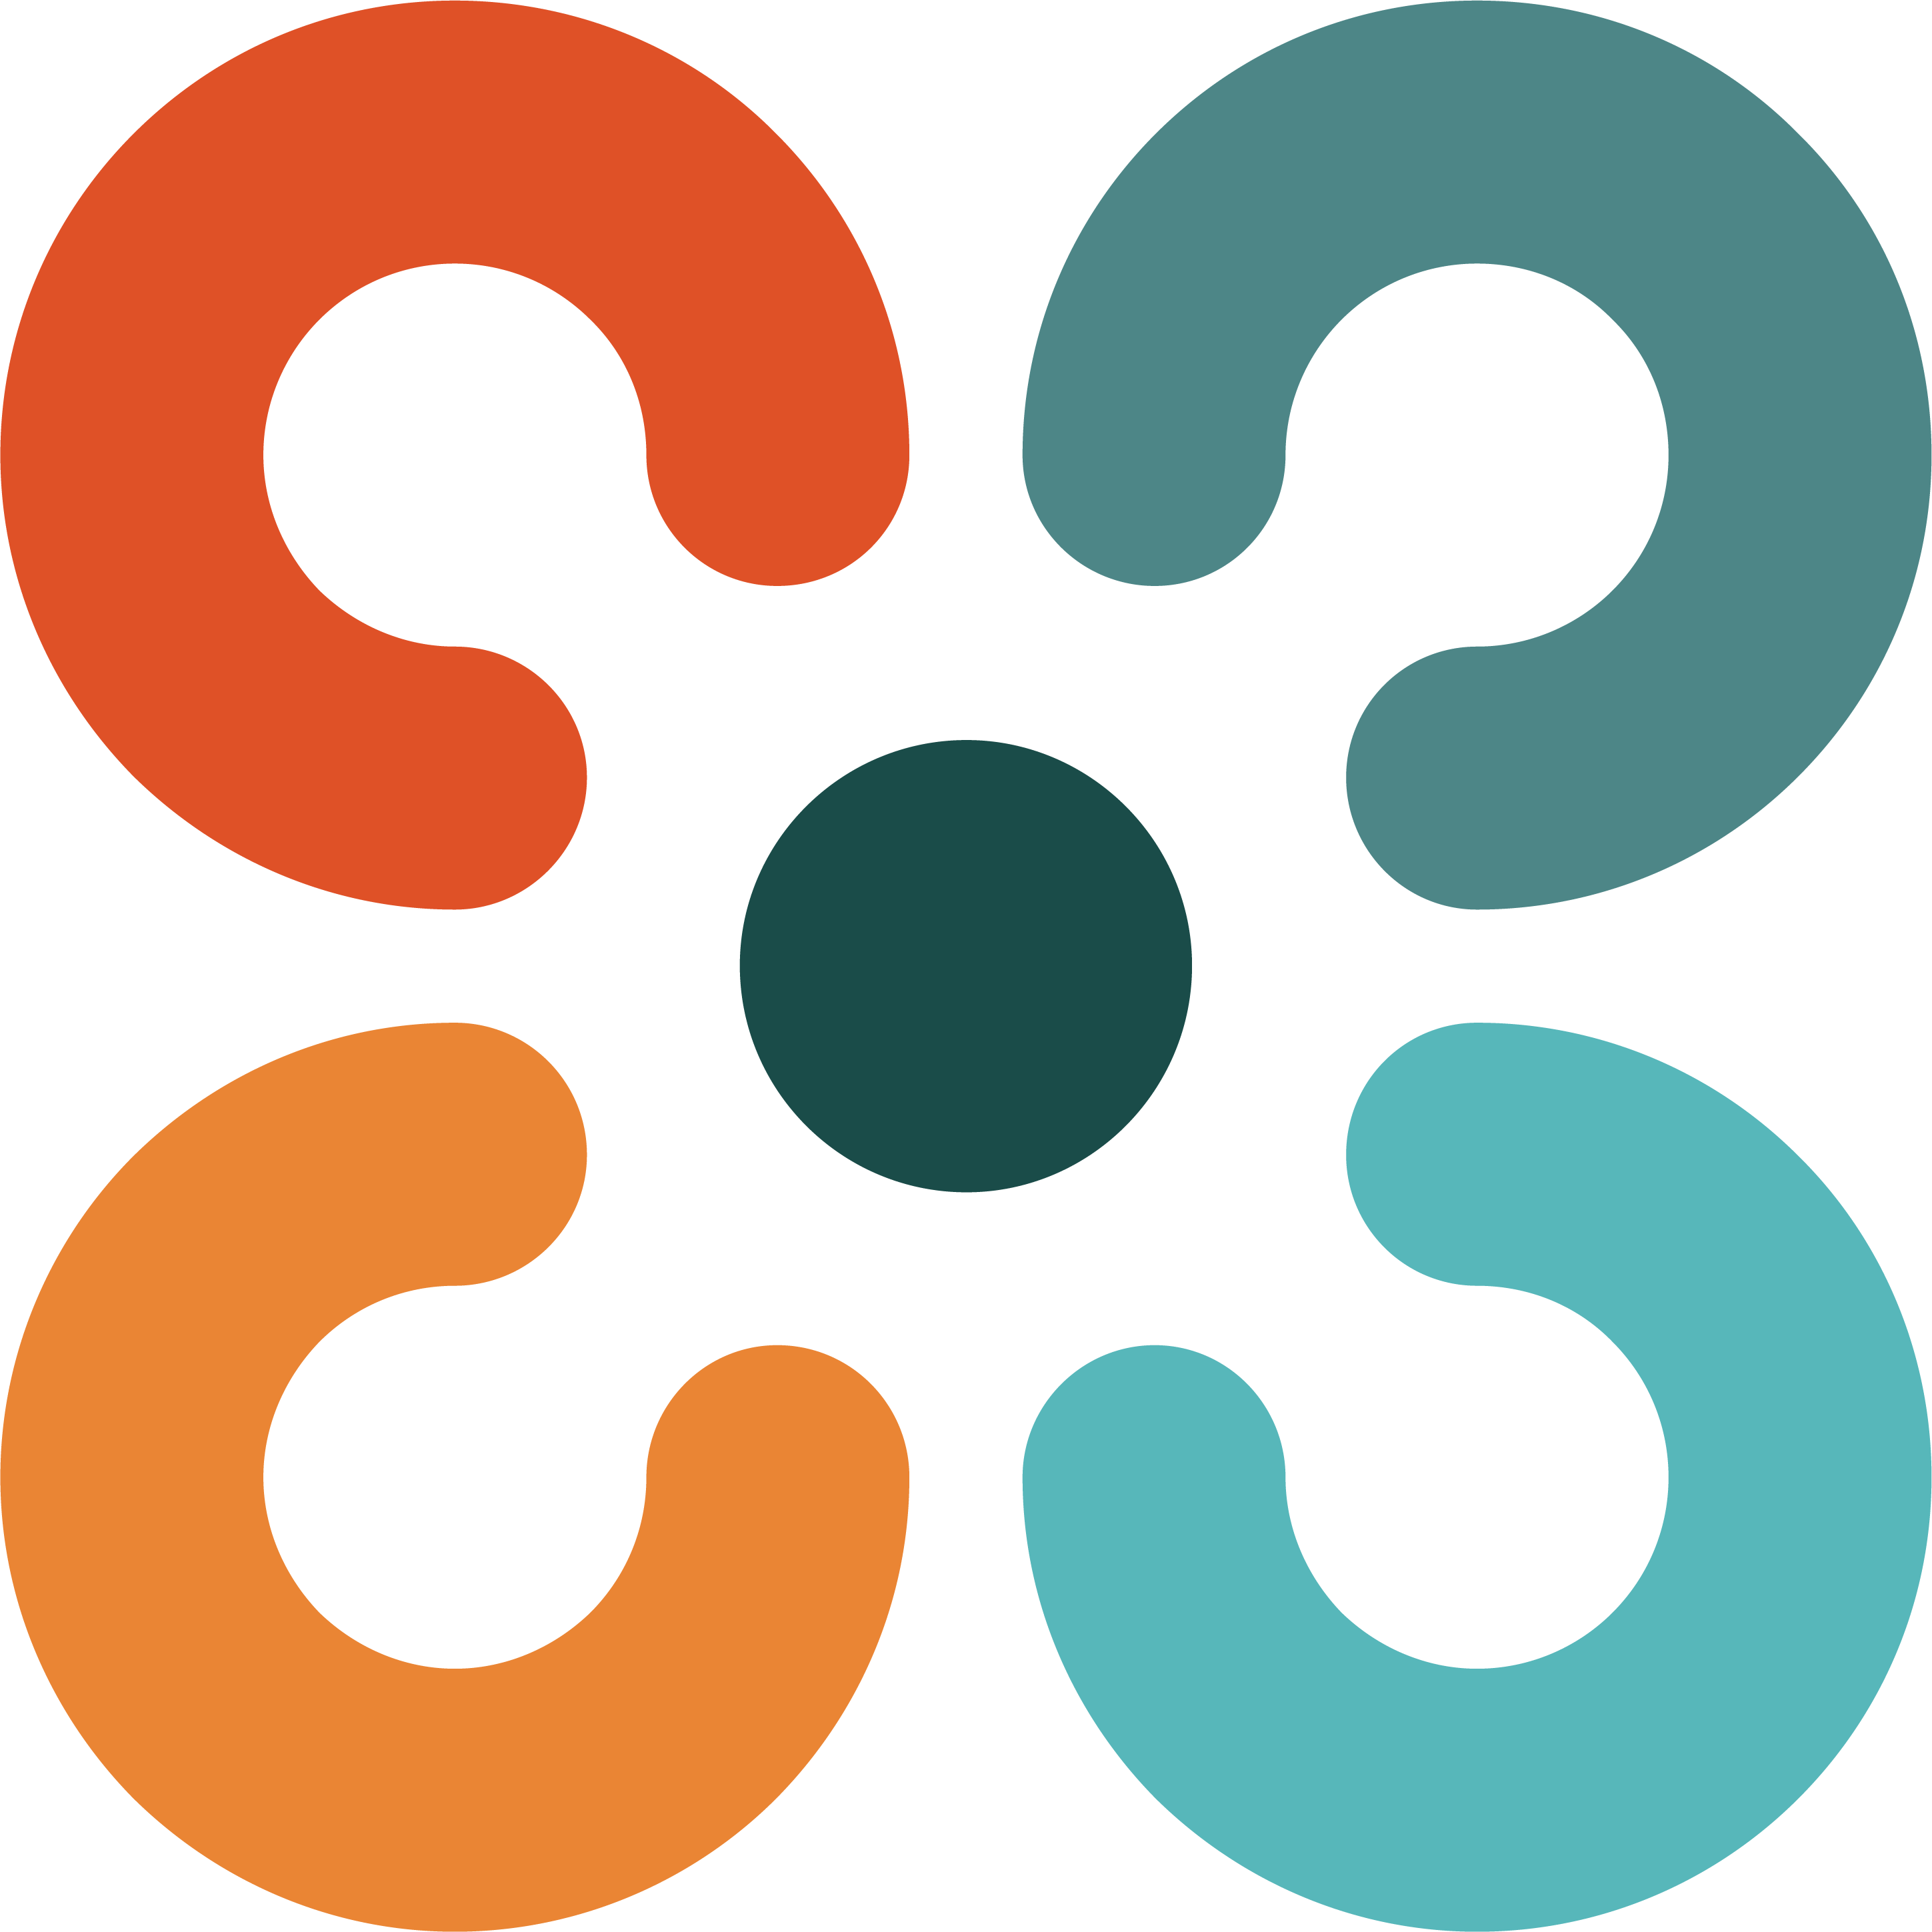

In [ ]:
logo_only.IMAGE_OBJECT

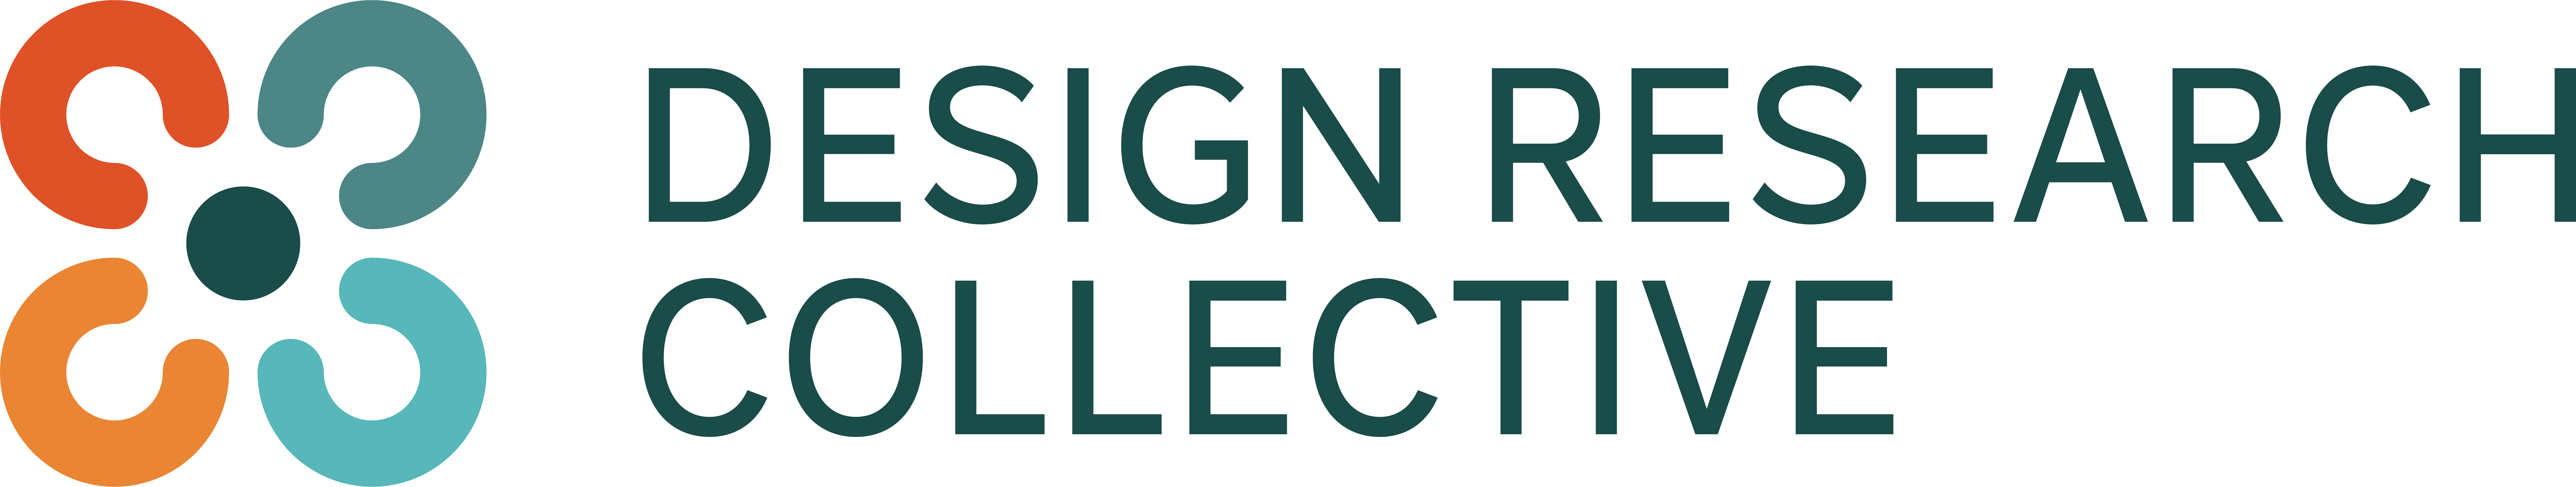

In [ ]:
horizontal_logo.IMAGE_OBJECT

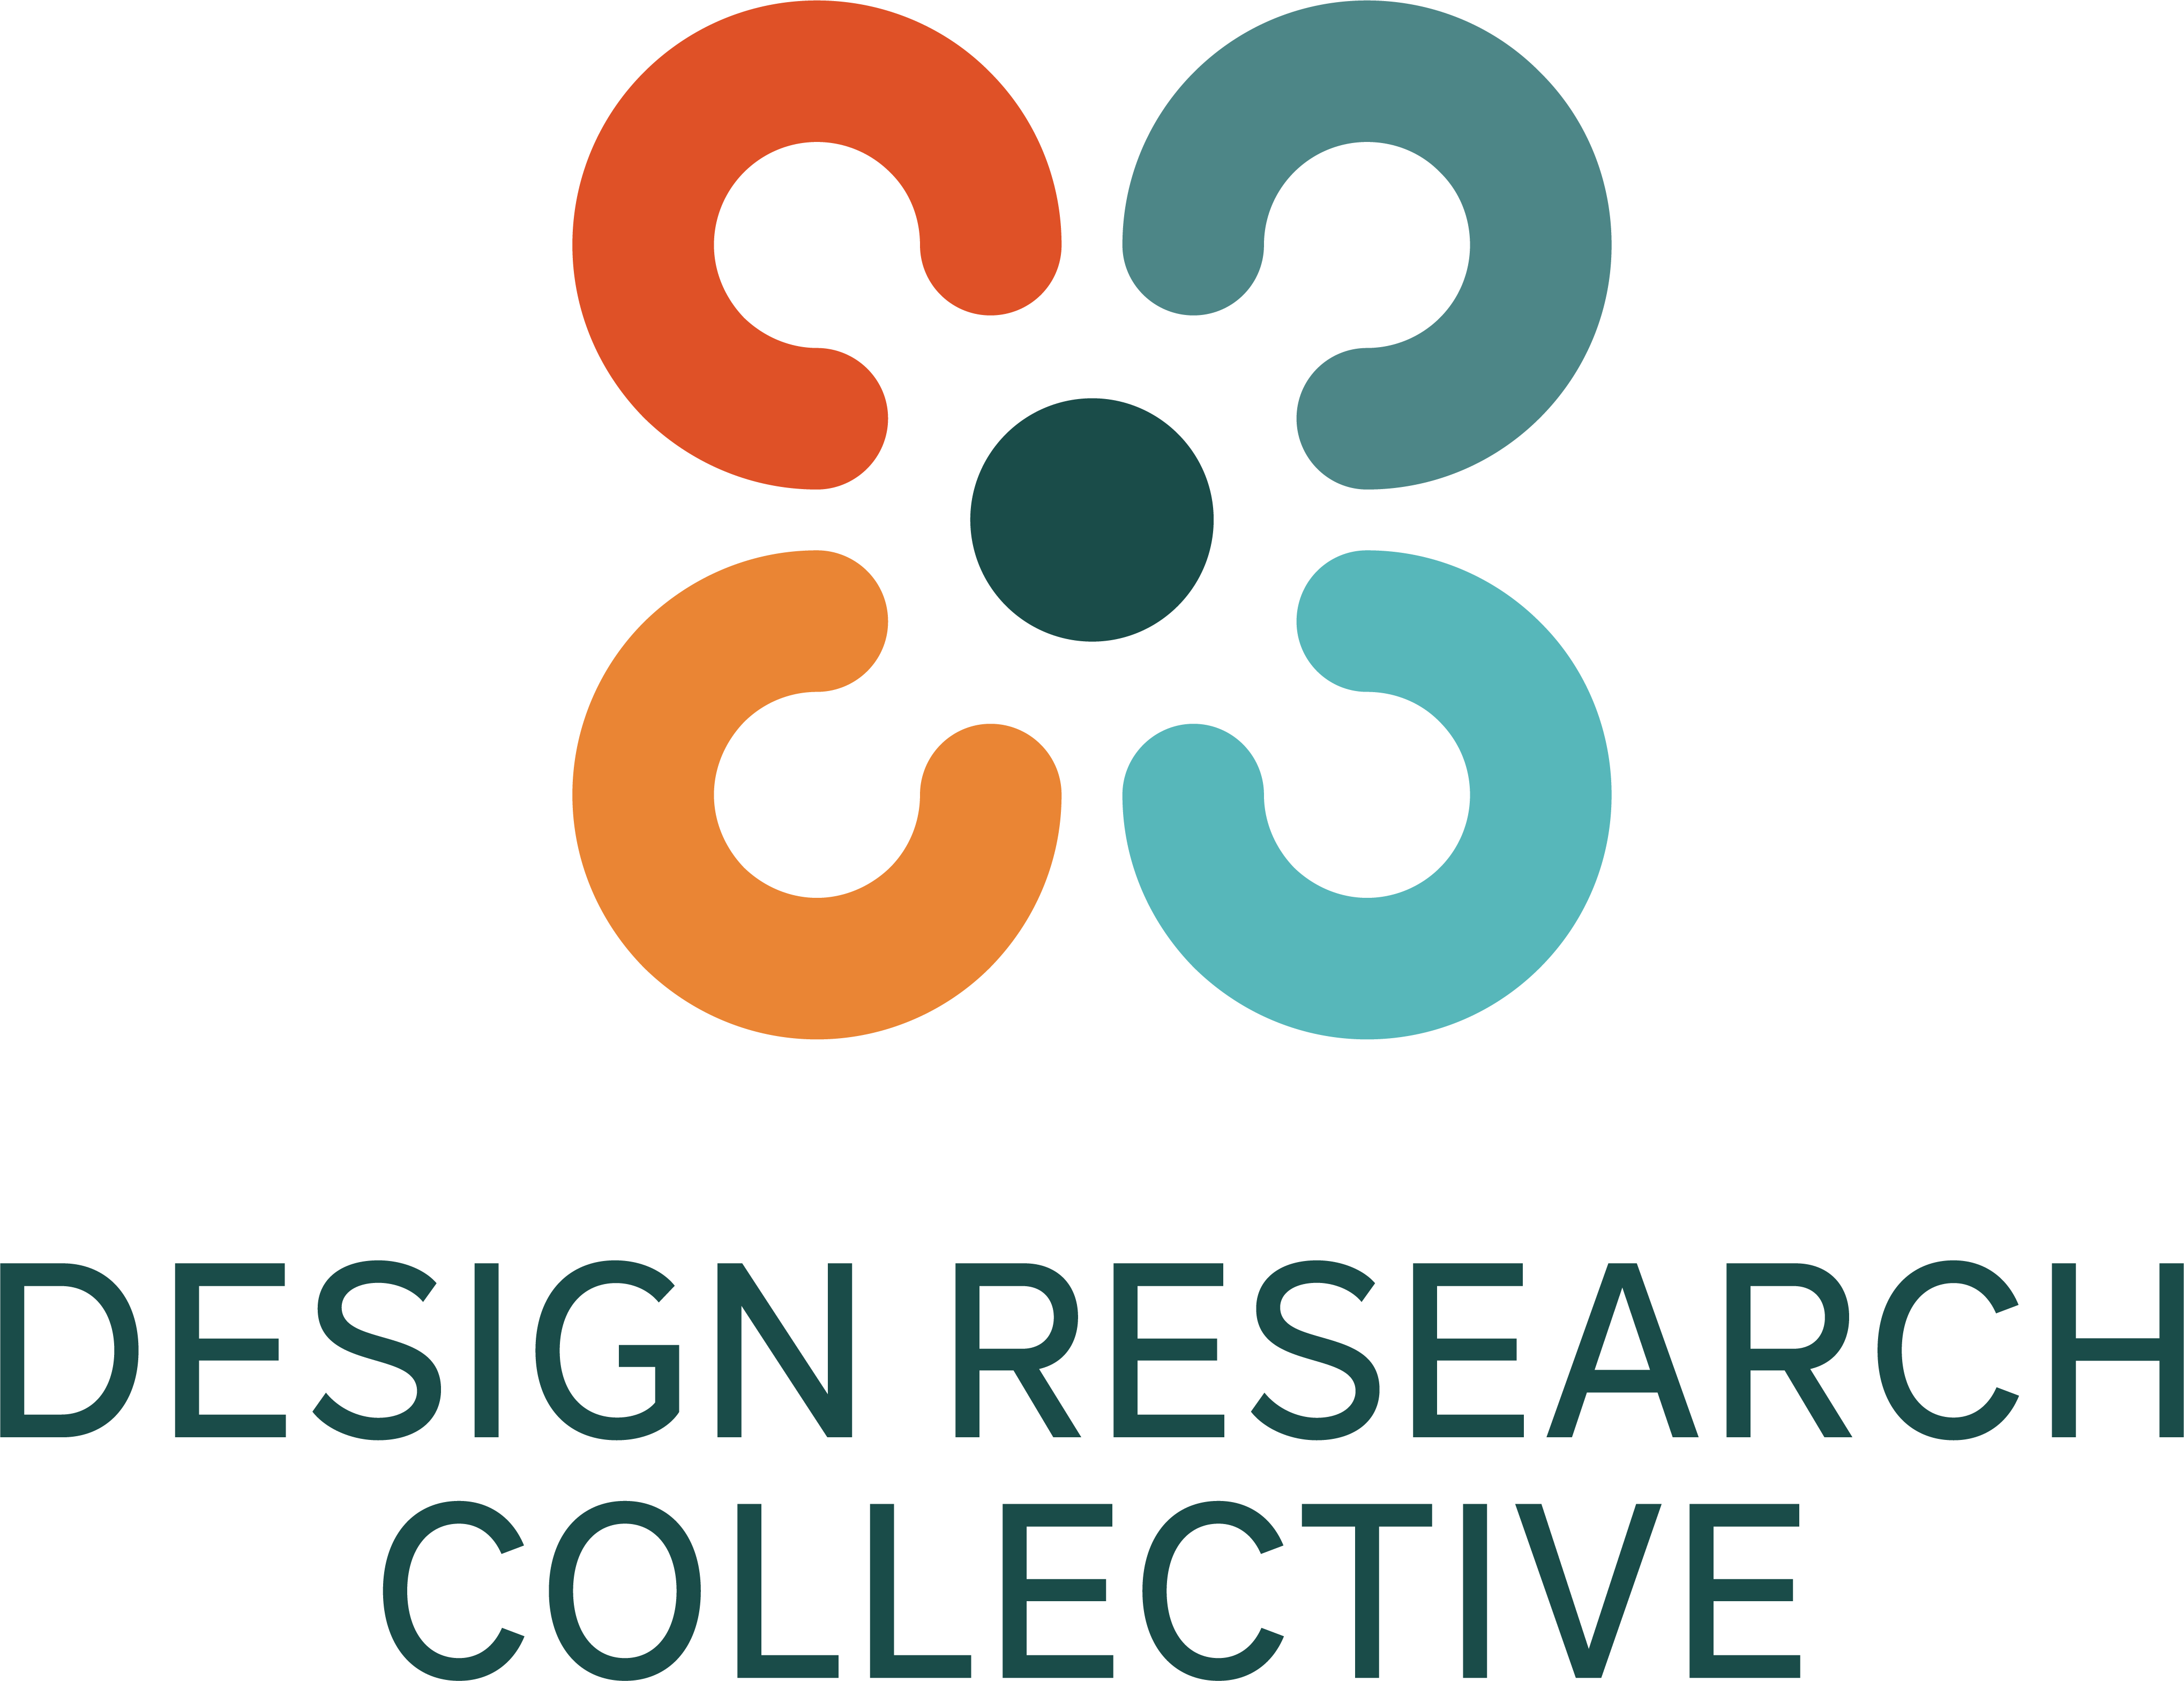

In [ ]:
stacked_logo.IMAGE_OBJECT

In [ ]:
import plotly.graph_objects

def plot_mesh(stl_mesh):
    # stl_mesh is read by nympy-stl from a stl file; it is  an array of faces/triangles (i.e. three 3d points) 
    # this function extracts the unique vertices and the lists I, J, K to define a Plotly mesh3d
    p, q, r = stl_mesh.vectors.shape #(p, 3, 3)
    # the array stl_mesh.vectors.reshape(p*q, r) can contain multiple copies of the same vertex;
    # extract unique vertices from all mesh triangles
    vertices, ixr = numpy.unique(stl_mesh.vectors.reshape(p*q, r), return_inverse=True, axis=0)
    I = numpy.take(ixr, [3*k for k in range(p)])
    J = numpy.take(ixr, [3*k+1 for k in range(p)])
    K = numpy.take(ixr, [3*k+2 for k in range(p)])
    x, y, z = vertices.T
    colorscale= [[0, drcutils.plotting_stack.COLORS[2]], [1, drcutils.plotting_stack.COLORS[2]]]  

    mesh3D = plotly.graph_objects.Mesh3d(
            x=x,
            y=y,
            z=z, 
            i=I, 
            j=J, 
            k=K, 
            flatshading=True,
            colorscale=colorscale, 
            intensity=z, 
            showscale=False) 
    layout = plotly.graph_objects.Layout(
            scene_xaxis_visible=False,
            scene_yaxis_visible=False,
            scene_zaxis_visible=False,
            scene_aspectmode="data"
            )
    fig = plotly.graph_objects.Figure(data=[mesh3D], layout=layout)
    fig.data[0].update(lighting=dict(ambient= 0.18,
                                 diffuse= 1,
                                 fresnel=  .1,
                                 specular= 1,
                                 roughness= .1,
                                 facenormalsepsilon=0))
    return fig

In [ ]:
drcutils.plotting_stack.plot_mesh(drcutils.plotting_stack.logo_only.MESH_OBJECT)